In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt, floor, ceil
import math

# cv2.blur() function smooths an image using the kernel which is represented as:

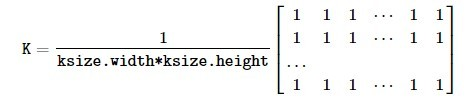

In [2]:
# path
path = "bird.jpg"

# Reading an image in default mode
image = cv.imread(path)

# Window name in which image is displayed
window_name = 'Image'

# ksize
ksize = (10, 10)

# Using cv2.blur() method
image1 = cv.blur(image, ksize, cv.BORDER_DEFAULT)

# Displaying the image
cv.imshow("Original Image", image)
k = cv.waitKey(0)

# Displaying the image
cv.imshow(window_name, image1)
k = cv.waitKey(0)

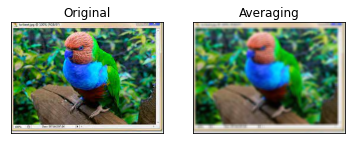

In [3]:
img = cv.imread('bird.jpg')

kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

# Use of blur function

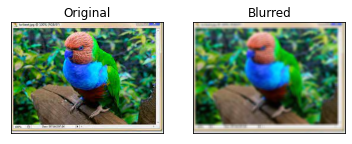

In [16]:
img = cv.imread('bird.jpg')

blur = cv.blur(img,(5,5))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

# 1. Averaging (Mean or Homogeneous filter)
## The Average filter is also known as box filter, homogeneous filter, and mean filter.

1. It must be odd ordered. 
2. The sum of all the elements should be 1.
3. All the elements should be the same.


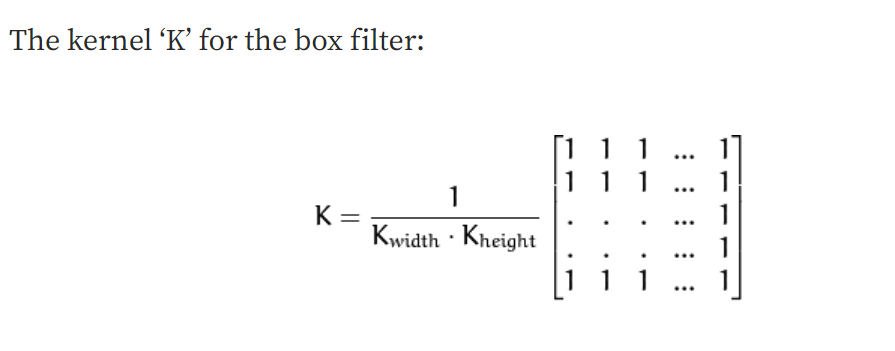

In [4]:
# Import the image
img = cv.imread('bird.jpg', 1)

# define a function for box filter
def box_kernel(size):
    k = np.ones((size,size),np.float32)/(size**2)
    return k
# Basically, the smallest the kernel, the less visible is the blur. In our example, we will use a 5 by 5 kernel.
size= 5

box_filter_img = cv.filter2D(img,-1,box_kernel(size)) # -1 for depth same as source

cv.imshow("Original Image", img)
k = cv.waitKey(0)

cv.imshow("Blurred-Box filter Image", box_filter_img)
k = cv.waitKey(0)

# 1.1 Box kernel application but using opencv blur function

In [21]:
# using blur function 
size = 5
box_filter_img1 = cv.blur(img,(size,size))

cv.imshow("Original Image", img)
k = cv.waitKey(0)

cv.imshow("Blurred-Box filter Image", box_filter_img1)
k = cv.waitKey(0)

# 2. Gaussian Filtering
## The equation for a Gaussian filter kernel of size (2k+1)×(2k+1) is given by:

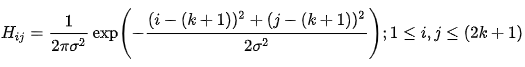

. A 5x5 gaussian filter will look like this:-
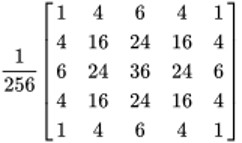



In [5]:
# Define a function for box filter
def gaussian_kernel(size, sigma=1): # applying above formula
    size = int(size) // 2
    #Numpy Mgrid is a special type of numpy array that creates a 2d array with similar values. 
    # This method calls the meshgrid method to initialize dense multidimensional arrays. 
    # Moreover, mgrid also accepts complex numbers as parameter.
    x, y = np.mgrid[-size:size+1, -size:size+1]
    
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

size=5

# Apply the gaussian blur
gaussian_filter_img = cv.filter2D(img,-1, gaussian_kernel(size, sigma=1))

cv.imshow("Original Image", img)
k = cv.waitKey(0)

cv.imshow("Blurred-Gaussian Filter Image", gaussian_filter_img)
k = cv.waitKey(0)

# 2.1 Gaussian kernel application but using opencv GaussianBlur function

In [6]:
size = 5
gaussian_filter_img = cv.GaussianBlur(img,(size,size),0)

# Show original Image
cv.imshow("Original Image", img)
k = cv.waitKey(0)

# Blurred Image after applying gaussian blur function
cv.imshow("Blurred-Box filter Image", box_filter_img1)
k = cv.waitKey(0)

NameError: name 'box_filter_img1' is not defined

#  3. Bilateral Filtering 

1. Sigma values: For simplicity, you can set the 2 sigma values to be the same. If they are small (< 10), the filter will not have much effect, whereas if they are large (> 150), they will have a very strong effect, making the image look "cartoonish".

2. Filter size: Large filters (d > 5) are very slow, so it is recommended to use d=5 for real-time applications, and perhaps d=9 for offline applications that need heavy noise filtering.

3. This filter does not work inplace.

4. Two gaussian filters are used here one for blurring neighbourhood pixels and other for intensity diff. comparison, so as to preserve the edges as the intensity diffrence will be high near edges

## Bilateral Formula as follows:
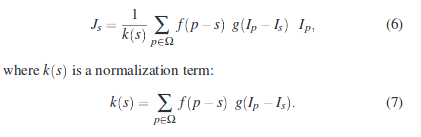

In [7]:
# gaussian filter
def gfunc(x,y,sigma):
    return (math.exp(-(x**2 + y**2)/(2*(sigma**2))))/(2*3.14*(sigma**2))

def gaussFilter(size, sigma):
    out = np.zeros(size)
    for i in range(size[0]):
        for j in range(size[1]):
            out[i,j] = gfunc(i-size[0]//2,j-size[1]//2, sigma )
    return out/np.sum(out)

(gfw,gfh) = (3,3)
gaussianFilter = gaussFilter((gfw,gfh),1)

print("Gaussian Filter")
print(gaussianFilter)

Gaussian Filter
[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]


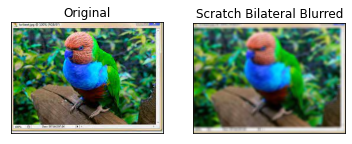

In [8]:
img = cv.imread("bird.jpg")


# bilateral filter

def bfunc(i,j,fw,fh,image,sigma1, sigma2, bilateralWFilter):
    imgwork = image[i - fh//2:i+1 + fh//2, j - fw//2:j+1 + fw//2, :]
    
    bilateralIFilter = ((imgwork - image[i, j,:])**2 )/(2*(sigma1**2))
    
    bilateralFilter = np.exp(-1*bilateralIFilter)*bilateralWFilter
    bilateralFilter = bilateralFilter/np.sum(bilateralFilter,axis=(0,1))
    return np.sum(np.multiply(imgwork, bilateralFilter),axis=(0,1))

def bilateralFilterConv(image, fw,fh):
    size = image.shape
    sigma1 = 40
    sigma2 = 40
    bilateral1 = 2*3.14*sigma2*sigma2*gaussFilter((fw,fh), sigma2)
    if len(image.shape) < 3  or image.shape[2] == 1:
        bilateralWFilter = np.resize(bilateral1,(*bilateral1.shape,1))
    else:
        bilateralWFilter = np.stack([bilateral1, bilateral1, bilateral1], axis=2)
    
    out = np.zeros((size[0]-2*fw +1,size[1]-2*fh +1,size[2]))
    for i in range(size[0]-2*fh +1):
        for j in range(size[1]-2*fw +1):
            out[i,j,:] = bfunc(i+fw-1, j+fh-1, fw, fh, image, sigma1, sigma2, bilateralWFilter)
    
    if image.shape[2] == 1:
        return np.resize(out, (out.shape[0], out.shape[1])).astype(np.uint8)
    else:
        return out.astype(np.uint8)


bfw,bfh = (5, 5)
bilateral_image = bilateralFilterConv(img, bfw,bfh)
cv.imshow("Bilateral Blurred Image", bilateral_image)
k=cv.waitKey(0)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(bilateral_image),plt.title('Scratch Bilateral Blurred')
plt.xticks([]), plt.yticks([])    
plt.show()


# Using Look up Table

In [39]:
import numpy as np
import cv2
import time

# image: input image
# texture: guidance image
# sigma_s: spatial parameter (pixels)
# sigma_r: range parameter (not normalized)
def bilateralfilter(image, texture, sigma_s, sigma_r):
    r = int(np.ceil(3 * sigma_s))
    # Image padding
    if image.ndim == 3:
        h, w, ch = image.shape
        I = np.pad(image, ((r, r), (r, r), (0, 0)), 'symmetric').astype(np.float32)
    elif image.ndim == 2:
        h, w = image.shape
        I = np.pad(image, ((r, r), (r, r)), 'symmetric').astype(np.float32)
    else:
        print('Input image is not valid!')
        return image
    # Check texture size and do padding
    if texture.ndim == 3:
        ht, wt, cht = texture.shape
        if ht != h or wt != w:
            print('The guidance image is not aligned with input image!')
            return image
        T = np.pad(texture, ((r, r), (r, r), (0, 0)), 'symmetric').astype(np.int32)
    elif texture.ndim == 2:
        ht, wt = texture.shape
        if ht != h or wt != w:
            print('The guidance image is not aligned with input image!')
            return image
        T = np.pad(texture, ((r, r), (r, r)), 'symmetric').astype(np.int32)
    # Pre-compute
    output = np.zeros_like(image)
    scaleFactor_s = 1 / (2 * sigma_s * sigma_s)
    scaleFactor_r = 1 / (2 * sigma_r * sigma_r)
    # A lookup table for range kernel
    LUT = np.exp(-np.arange(256) * np.arange(256) * scaleFactor_r)
    # Generate a spatial Gaussian function
    x, y = np.meshgrid(np.arange(2 * r + 1) - r, np.arange(2 * r + 1) - r)
    kernel_s = np.exp(-(x * x + y * y) * scaleFactor_s)
    # Main body
    if I.ndim == 2 and T.ndim == 2:     # I1T1 filter
        for y in range(r, r + h):
            for x in range(r, r + w):
                wgt = LUT[np.abs(T[y - r:y + r + 1, x - r:x + r + 1] - T[y, x])] * kernel_s
                output[y - r, x - r] = np.sum(wgt * I[y - r:y + r + 1, x - r:x + r + 1]) / np.sum(wgt)
    elif I.ndim == 3 and T.ndim == 2:     # I3T1 filter
        for y in range(r, r + h):
            for x in range(r, r + w):
                wgt = LUT[abs(T[y - r:y + r + 1, x - r:x + r + 1] - T[y, x])] * kernel_s
                wacc = np.sum(wgt)
                output[y - r, x - r, 0] = np.sum(wgt * I[y - r:y + r + 1, x - r:x + r + 1, 0]) / wacc
                output[y - r, x - r, 1] = np.sum(wgt * I[y - r:y + r + 1, x - r:x + r + 1, 1]) / wacc
                output[y - r, x - r, 2] = np.sum(wgt * I[y - r:y + r + 1, x - r:x + r + 1, 2]) / wacc
    elif I.ndim == 3 and T.ndim == 3:     # I3T3 filter
        for y in range(r, r + h):
            for x in range(r, r + w):
                wgt = LUT[abs(T[y - r:y + r + 1, x - r:x + r + 1, 0] - T[y, x, 0])] * \
                      LUT[abs(T[y - r:y + r + 1, x - r:x + r + 1, 1] - T[y, x, 1])] * \
                      LUT[abs(T[y - r:y + r + 1, x - r:x + r + 1, 2] - T[y, x, 2])] * \
                      kernel_s
                wacc = np.sum(wgt)
                output[y - r, x - r, 0] = np.sum(wgt * I[y - r:y + r + 1, x - r:x + r + 1, 0]) / wacc
                output[y - r, x - r, 1] = np.sum(wgt * I[y - r:y + r + 1, x - r:x + r + 1, 1]) / wacc
                output[y - r, x - r, 2] = np.sum(wgt * I[y - r:y + r + 1, x - r:x + r + 1, 2]) / wacc
    elif I.ndim == 2 and T.ndim == 3:     # I1T3 filter
        for y in range(r, r + h):
            for x in range(r, r + w):
                wgt = LUT[abs(T[y - r:y + r + 1, x - r:x + r + 1, 0] - T[y, x, 0])] * \
                      LUT[abs(T[y - r:y + r + 1, x - r:x + r + 1, 1] - T[y, x, 1])] * \
                      LUT[abs(T[y - r:y + r + 1, x - r:x + r + 1, 2] - T[y, x, 2])] * \
                      kernel_s
                output[y - r, x - r] = np.sum(wgt * I[y - r:y + r + 1, x - r:x + r + 1]) / np.sum(wgt)
    else:
        print('Something wrong!')
        return image

    # return np.clip(output, 0, 255)
    return output


if __name__ == '__main__':
    sigma_s = 1
    sigma_r = 0.1 *255
    img = cv2.imread('bird.jpg')
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    tic = time.time()
    img_bf = bilateralfilter(img, img_gray, sigma_s, sigma_r)
    toc = time.time()
    print('Elapsed time: %f sec.' % (toc - tic))
#     cv2.imwrite('2c_y.png', img_gray)
#     cv2.imwrite('output.png', img_bf)
    cv2.imshow("Original Image", img)
    k= cv2.waitKey(0)
    
    cv2.imshow("Bilateral Blurred Image", img_bf)
    k= cv2.waitKey(0)

Elapsed time: 1.128628 sec.


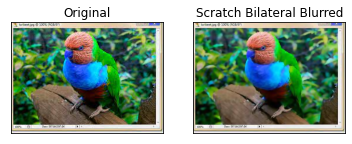

In [38]:
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_bf),plt.title('Scratch Bilateral Blurred')
plt.xticks([]), plt.yticks([])    
plt.show()


# Comparison of all the 3 blurring methods output with varying kernel size


with kernel size: 3


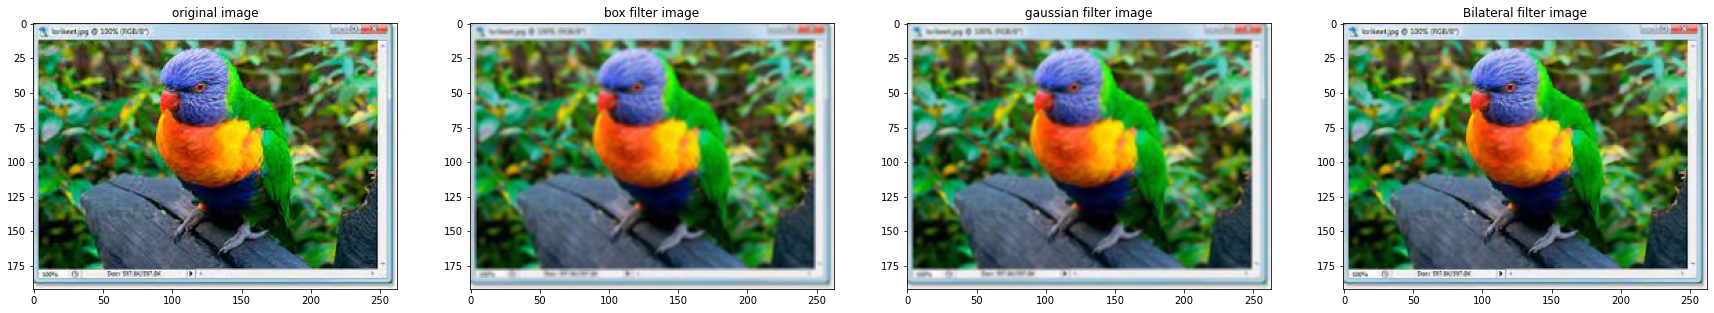

with kernel size: 11


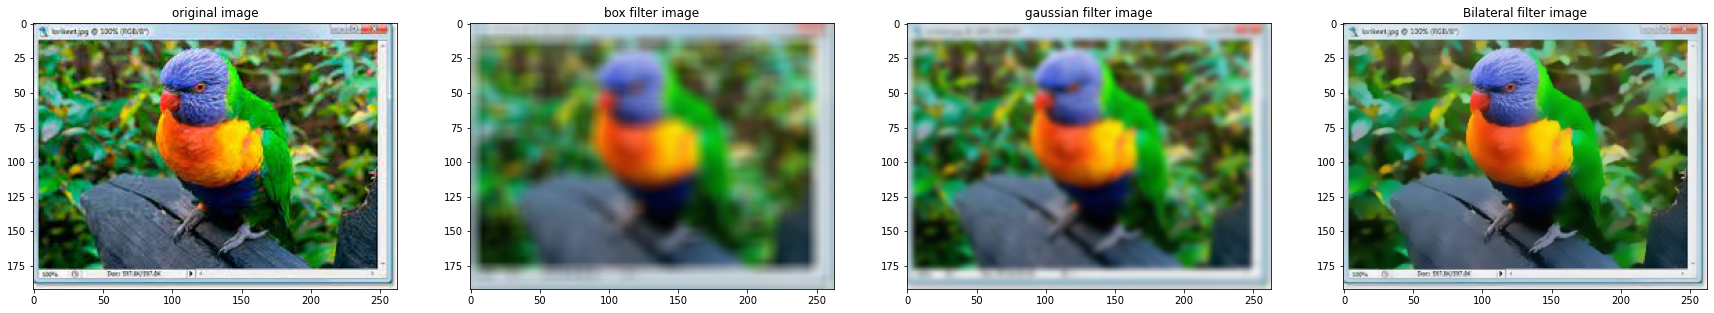

with kernel size: 19


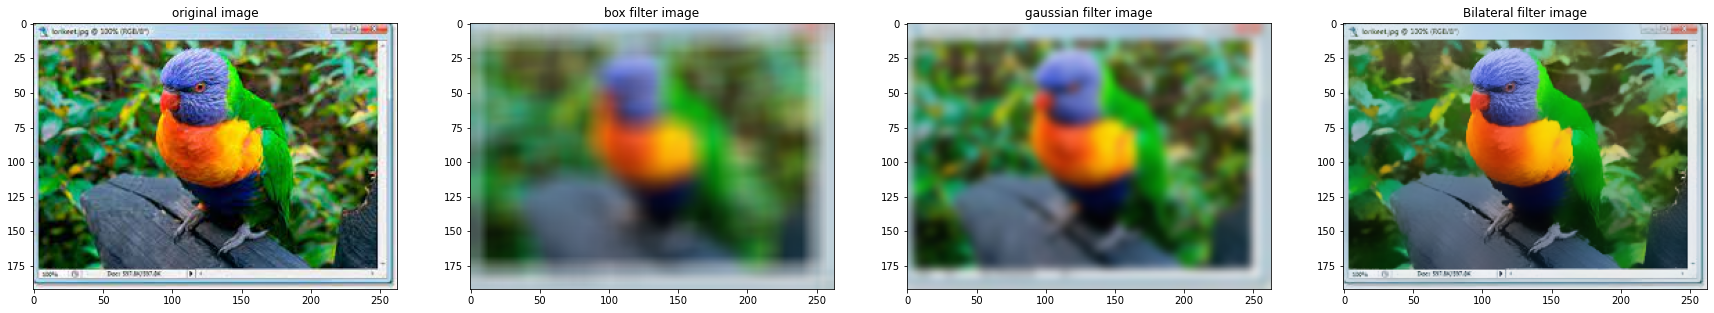

with kernel size: 27


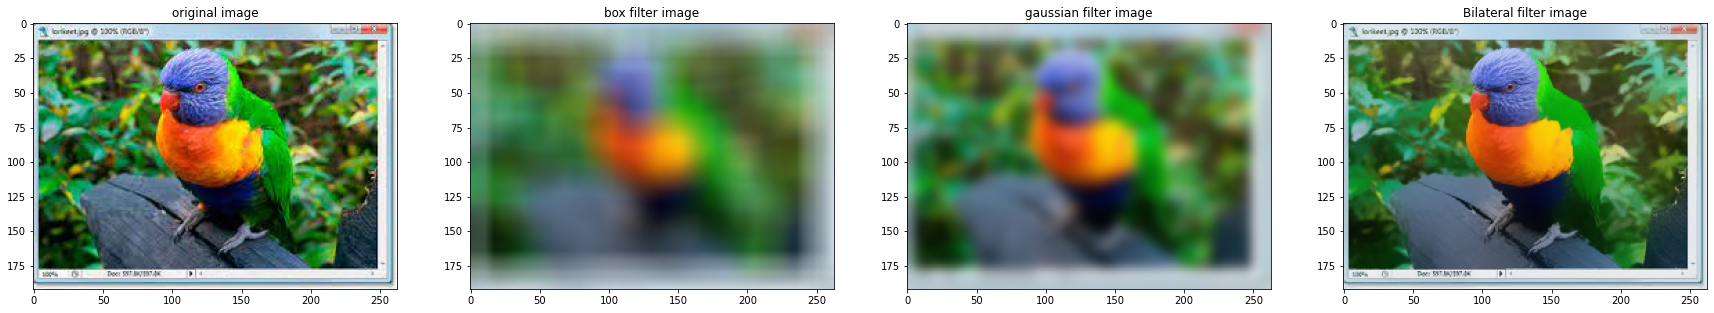

In [33]:
# Define a function for plotting multiple figures
def plot_img(images, titles):
    fig, axs = plt.subplots(nrows = 1, ncols = len(images),
                          figsize = (30, 30))
    for i, p in enumerate(images):
        axs[i].imshow(cv.cvtColor(p, cv.COLOR_BGR2RGB))
        axs[i].set_title(titles[i])
        #axs[i].axis('off')
    plt.show()
    
# To show a side by side comparison of different filters with different kernel sizes.
for i in range(3,30,8):
    print("with kernel size: "+str(i))
    a_img = cv.blur(img,(i,i))
    g_img = cv.GaussianBlur(img,(i,i),0)
    b_img = cv.bilateralFilter(img,i,75,75)
    images=[img, a_img, g_img, b_img]
    titles=['original image',
          'box filter image',
          'gaussian filter image',
          'Bilateral filter image']
    plot_img(images, titles)


# 4. Median Filtering

In [11]:
# using opencv function
# Read the image
noisy_img = cv.imread('balloons_noisy.png',1)

# Here I've used 5x5 kernel
size = 5

# Denoise the image using median filtering
denoise_img = cv.medianBlur(noisy_img,size)

# Show original Image
cv.imshow("Original Image", noisy_img)
k = cv.waitKey(0)

# Show original Image
cv.imshow("Denoised Image", denoise_img)
k = cv.waitKey(0)


# 4.1 Scratch Implementation of Median Filtering

In [12]:
# Median Spatial Domain Filtering

# Read the image
img_noisy1 = cv.imread('balloons_noisy.png', 0)

# Obtain the number of rows and columns
# of the image
m, n = img_noisy1.shape

# Traverse the image. For every 3X3 area,
# find the median of the pixels and
# replace the center pixel by the median
img_new1 = np.zeros([m, n])

for i in range(1, m-1):
    for j in range(1, n-1):
        temp = [img_noisy1[i-1, j-1],
                img_noisy1[i-1, j],
                img_noisy1[i-1, j + 1],
                img_noisy1[i, j-1],
                img_noisy1[i, j],
                img_noisy1[i, j + 1],
                img_noisy1[i + 1, j-1],
                img_noisy1[i + 1, j],
                img_noisy1[i + 1, j + 1]]
  
        temp = sorted(temp)
        img_new1[i, j]= temp[4]

img_new1 = img_new1.astype(np.uint8)
# cv2.imwrite('new_median_filtered.png', img_new1)

# Show original Image
cv.imshow("Original Image", img_noisy1)
k = cv.waitKey(0)

# Show original Image
cv.imshow("Denoised Image", img_new1)
k = cv.waitKey(0)
